# K-Means Clustering in Python # 

Killian McKee

## Overview ## 

1. [What is K-Means Clustering?](#section1)
2. [Key Terms](#section2) 
3. [Pros and Cons of K-Means Clustering](#section3)
4. [When to use K-Means Clustering](#section4)
5. [Key Parameters](#section5) 
6. [Walkthrough: Building a k means clustering model](#section6)
7. [Additional Reading](#section7) 
8. [Conclusion](#section8)
9. [Sources](#section9)

<a id='section1'></a>

## What is K Means Clustering? ##

K means clustering is a clustering algorithm. Clustering algorithms are unsupervised learning methods used to find non overlapping groups within a set of data. Typically, clustering (and unsupervised methods in general) are used in the exploratory data analysis phase of a machine learning project to better understand the underlying structure of our data. Clustering is especially common in medical and marketing settings where it can be used to more clearly understand patient groups and customer subgroups, respectively. K means clustering is a straightforward and effective method of splitting data into k non overlapping groups. To perform k means clustering we first specify the number of clusters we want in our data, then the clustering algorithm assigns every observation to the group to which it most closely belongs. More specifically, a number (1 through k) is randomly assigned to each observation in the data. Next, a centroid is computed for each for each of the k clusters, where the kth cluster centroid is a point obtained by taking the means of all the features within the cluster. Lastly, the algorithm reassigns all the points to the cluster based on the centroid to which they are the closest. K means clustering gives the local optimum, so it is important to run the algorithm multiple times to ensure the best solution arises. 

### Visualizations of K Means Clustering ### 

<img src='kmeans_explanation.jpg'>

<img src='k_clustering.gif'>

<img src='cluster_example.png'>

<a id='section2'></a>

## Key Terms ##

1. **Clustering**: Unsupervised learning technique to find non-overlapping subgroups within a dataset. Commonly used to find customer or patient groups, analomies, or to get a general data visualization.
2. **K**: The number of clusters, selected by the user. 
3. **Centroid**: The average center of mass within a cluster. Used to help determine what observation in a dataset belongs in which cluster. 

<a id='section3'></a>

## Pros and Cons of K Means Clustering ##

### Pros ### 

1. **Simple**: The math behind k means clustering is not overly complex and the results are easy to interpret, visualize, and explain. 
2. **Efficient**: K means clustering runs effectively on large or datasets. 
3. **Flexible**: K means clustering can be applied to a variety of problems and has adjustable parameters. 
4. **Fast**: One of the fastest clustering algorithms since its complexity is only O(knT), where k,n and T are the number of clusters, samples and iterations, respectively.

### Cons ### 

1. **Non Optimal Cluster Numbers**: Since the user has to specify k, the clustering algorithm cannot find and create the optimal number of clusters. 
2. **Finds Local Minima**: K means clustering finds the local optimum, not the globally best solution. To combat this, users need to run the algorithm multiple times to ensure they are getting good results. 
3. **Lack of Validation**: this is a problem of unsupervised learning generally, but there is no agreed upon way in which to verify the accuracy of unsupervised learning models because they lack a target variable to use as an accuracy measure. 
4. **Does Poorly on Non-Globular Data**: K means tends to make circular/globular clusters. If one's data is a strange shape, like a swirl, k means fail miserably. 

<a id='section4'></a>

## When to use K Means Clustering ##

K means clustering works well when one is interested in understanding the shape of their data, the subgroups within their data, or if there is interest in identifying outlying data points. k-means clustering is commonly used in marketing, research studies, realty (predicting house prices), fraud detection, document classification, medicine, and imagery processing.  

<a id='section5'></a>

## Key Parameters ## 

**n_clusters**: i.e. K, the number of clusters
**init**: This is how the clusters are initially created. One can specify the initial centroid points with an array, random starting points, or accept the defaults of a package like scikit learn. 
**n_init**: The number of times to run the the k means model. Since k means clustering can get stuck giving a local optimum instead of a global, it is important to run the model multiple times 

<a id='section6'></a>

## Walkthrough: Building a K Means Clustering Model ##

In this walkthroug we will stepping throug a k means clustering model to visualize the [digits dataset](https://scikit-learn.org/stable/auto_examples/datasets/plot_digits_last_image.html). The digits dataset contains handwritten numbers (0-9). Ultimately, we would expect to see 9 different groups form given the differences in each number. We will perform the following steps: 

1. import the necessary packages 
2. load the dataset 
3. scale the data (this is done because k means uses euclidean distance, so everything needs to be scaled relative to each other)
4. examine and visualize our data 
5. create 3 clustering models with different initializations
6. compare the accuracy of the 3 models 
7. create a visualization for the most accurate model

In [96]:
# import necessary packages 

from time import time 
import matplotlib.pyplot as plt
import numpy as np 
from sklearn import metrics 
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale 

In [97]:
# load our dataset 

digits_dataset=load_digits()

In [98]:
# scale the data 

data=scale(digits_data.data)

In [99]:
# examine the data 

print('dataset shape:',data.shape)
print('dataset type:',data.dtype)
print('dataset head:',data[0:3]) #these are arrays of pixel coordinates used to print the digits dataset (these ones are scaled)

dataset shape: (1797, 64)
dataset type: float64
dataset head: [[ 0.         -0.33501649 -0.04308102  0.27407152 -0.66447751 -0.84412939
  -0.40972392 -0.12502292 -0.05907756 -0.62400926  0.4829745   0.75962245
  -0.05842586  1.12772113  0.87958306 -0.13043338 -0.04462507  0.11144272
   0.89588044 -0.86066632 -1.14964846  0.51547187  1.90596347 -0.11422184
  -0.03337973  0.48648928  0.46988512 -1.49990136 -1.61406277  0.07639777
   1.54181413 -0.04723238  0.          0.76465553  0.05263019 -1.44763006
  -1.73666443  0.04361588  1.43955804  0.         -0.06134367  0.8105536
   0.63011714 -1.12245711 -1.06623158  0.66096475  0.81845076 -0.08874162
  -0.03543326  0.74211893  1.15065212 -0.86867056  0.11012973  0.53761116
  -0.75743581 -0.20978513 -0.02359646 -0.29908135  0.08671869  0.20829258
  -0.36677122 -1.14664746 -0.5056698  -0.19600752]
 [ 0.         -0.33501649 -1.09493684  0.03864775  0.26875116 -0.13801953
  -0.40972392 -0.12502292 -0.05907756 -0.62400926 -1.91557297 -0.24630352


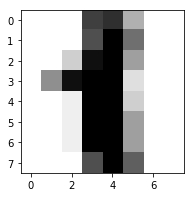

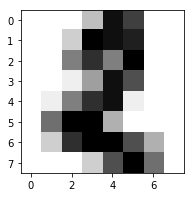

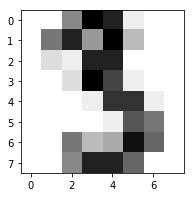

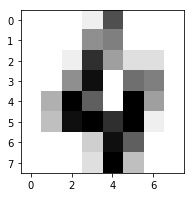

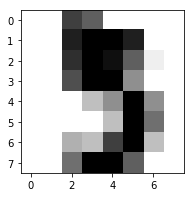

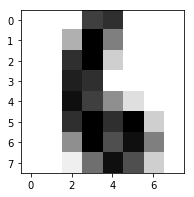

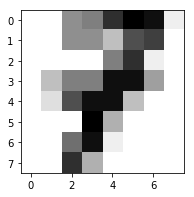

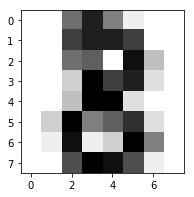

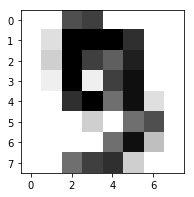

In [100]:
# lets check out some examples of the digits we might encounter

for i in range(1,10):
    plt.figure(1, figsize=(3, 3))
    plt.imshow(digits_dataset.images[i], cmap=plt.cm.gray_r, interpolation='nearest') #change the '0' in this line to see different numbers
    plt.show()

In [101]:
#specify our parameters for the clustering model 

n_samples, n_features = data.shape
n_digits = len(np.unique(digits_dataset.target))
labels = digits_dataset.target
sample_size = 300

print("n_digits: %d, \t n_samples: %d, \t n_features: %d"
      % (n_digits, n_samples, n_features))


n_digits: 10, 	 n_samples: 1797, 	 n_features: 64


In [102]:
# create a function to run our k means classifier and record its metadata

def bench_k_means(estimator, name, data):
    t0 = time()
    estimator.fit(data)
    print('%-9s\t%.2fs\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
          % (name, (time() - t0), estimator.inertia_,
             metrics.homogeneity_score(labels, estimator.labels_),
             metrics.completeness_score(labels, estimator.labels_),
             metrics.v_measure_score(labels, estimator.labels_),
             metrics.adjusted_rand_score(labels, estimator.labels_),
             metrics.adjusted_mutual_info_score(labels,  estimator.labels_),
             metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean',
                                      sample_size=sample_size)))


In [103]:
# run the model with different types of centroid initializations
# first we initialize with k means ++, then random, then using the principal components of the digit masses 
# for more info on principal components check out the reference guide on PCA

print('init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')

bench_k_means(KMeans(init='k-means++', n_clusters=n_digits, n_init=10),
              name="k-means++", data=data)

bench_k_means(KMeans(init='random', n_clusters=n_digits, n_init=10),
              name="random", data=data)

# in this case the seeding of the centers is deterministic, we run the algorithm only once with n_init=1

pca = PCA(n_components=n_digits).fit(data)
bench_k_means(KMeans(init=pca.components_, n_clusters=n_digits, n_init=1),
              name="PCA-based",
              data=data)


print('_')


init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	0.28s	69423	0.601	0.650	0.625	0.466	0.597	0.146
random   	0.23s	69424	0.602	0.650	0.625	0.467	0.598	0.149
PCA-based	0.04s	70756	0.665	0.692	0.678	0.552	0.661	0.142
_


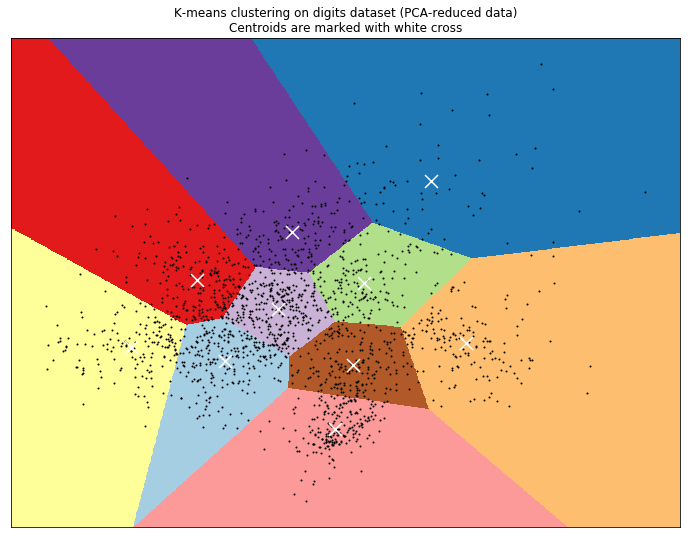

In [104]:
# let's create a visualization of our PCA model components 

reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease h to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].


# Plot the decision boundary. For that, we will assign a color to each

x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))


# Obtain labels for each point in mesh. Use last trained model.

Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])


# Put the result into a color plot

Z = Z.reshape(xx.shape)
plt.figure(figsize=(12,9))
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)

# Plot the centroids as a white X

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)

# define the plot title and bounds

plt.title('K-means clustering on digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

<a id='section7'></a>

## Additional Sources ##

1. [K means in depth, page 286](https://www-bcf.usc.edu/~gareth/ISL/ISLR%20First%20Printing.pdf)
2. [K means video explanation](https://www.youtube.com/watch?v=RD0nNK51Fp8)
3. [K means from scratch](https://pythonprogramming.net/k-means-from-scratch-machine-learning-tutorial/)

<a id='section8'></a>

## Conclusion ##

In this tutorial we stepped through k means clustering. K means clustering is an unsupervised learning technique that can be used to better understand the shape, subgroups, and visual layout of our data. Next, we covered some of the pros and cons (ease of use/implementation, local minima pitfalls respectively) and then tackled when to use k means clustering. Lastly, we stepped through a tutorial on how to build our own k means clustering algorithm on the Digits dataset. For those interested in learning more about unsupervised learning, consider reading the hierarchical clustering guide.

<a id='section9'></a>

## Sources ##

1. https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html
2. https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
3. https://www-bcf.usc.edu/~gareth/ISL/ISLR%20First%20Printing.pdf
4. https://towardsdatascience.com/k-means-clustering-from-a-to-z-f6242a314e9a
5. https://educationalresearchtechniques.com/2016/08/05/k-means-clustering/
6. https://www-bcf.usc.edu/~gareth/ISL/ISLR%20First%20Printing.pdf
7. https://www.youtube.com/watch?v=RD0nNK51Fp8